In [1]:
## it seems there is a bit more traffic when the weather is nice but interstingly from the time the underground 
#is closed until it opens again when it is called it seems there are rides when it is cold
# 11:00 and 12:00 seem to be the most affected by the weather, lunch time.

In [2]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt

from datetime import date


temperature_to_load = "temperature.csv"

temperature_data = pd.read_csv(temperature_to_load)



In [3]:
# File to Load (Remember to Change These)
uber_to_load = "ubernyc.csv"

uber_data = pd.read_csv(uber_to_load)

In [4]:
#from ubernyc.csv merge the columns DATE and TIME and round the time hours
uber_data.index = pd.to_datetime(uber_data["DATE"] + " " + uber_data["TIME"])


In [5]:
ut = uber_data.index.round("H")
ut = pd.DataFrame(ut)


In [6]:
# #Export the ut into a csv
# with open('test1.csv', mode='w') as output_data_file:
#     ut.to_csv(output_data_file, index_label="Index")


In [7]:
#take column from ut df with timestamps and make it into a list.
list1 = []
list1 = ut[0].tolist()

In [8]:
#count the number of uber rides per hour. The output looks like a library key: value, Key is the time and value the number of rides during that time
counter=collections.Counter(list1)

df_time_as_header = pd.DataFrame(counter, index=[0])
#transponde df_time_as_header to get correct format, one hour per row insated of one hour per column
df_final = df_time_as_header.T


In [9]:
#rename axis so that later the two df (Uber and Temperature) can  be merged using their index
df_final.rename_axis('datetime')

#rename column, by default 0, to 'number_of_rides' and change the name of the df to be more descriptive
df_number_of_rides_per_hour = df_final.rename(columns={0: 'number_of_rides'})

In [10]:
#use first one for fahr. I'm using the second one because i don't understand Fahr
# def kelvin_to_fahr(temp_kelvin):
#     temp_fahr = (((temp_kelvin - 273) * 9/5) + 32)
#     return temp_fahr

def kelvin_to_fahr(temp_kelvin):
    temp_fahr = temp_kelvin - 273
    return temp_fahr

In [11]:
#select columns 'datetime' and 'New York' from tempreature data and store in a new df NYC_df
NYC_df = temperature_data[['datetime', 'New York']].copy()

#make datetime the index for 'NYC_df' df
NYC_df.set_index('datetime', inplace=True)

#rename New York column to be Temperature in K
NYC_df = NYC_df.rename(columns={'New York': 'Temperature K'})

NYC_df = NYC_df.join(df_number_of_rides_per_hour, how='inner')


NYC_df["Temperature K"] = kelvin_to_fahr(NYC_df["Temperature K"])
NYC_df = NYC_df.rename(columns={'Temperature K': 'Temperature F'})


In [12]:
#Export the ut into a csv
with open('test2.csv', mode='w') as output_data_file:
    NYC_df.to_csv(output_data_file, index_label="Index")


In [13]:
NYC_df.reset_index(inplace=True)
NYC_df.head(5)


,index,Temperature F,number_of_rides
0,2014-07-01 00:00:00,27.91,20
1,2014-07-01 01:00:00,26.79,33
2,2014-07-01 02:00:00,25.24,21
3,2014-07-01 03:00:00,24.61,15
4,2014-07-01 04:00:00,24.22,19


In [165]:
number = 0
a = NYC_df.iloc[number,]
a = pd.DataFrame(a)
b = NYC_df.iloc[number+1,]
b = pd.DataFrame(b)
c = a.join(b, how='outer')
c.T

,index,Temperature F,number_of_rides
1,2014-07-01 01:00:00,26.79,33
2,2014-07-01 02:00:00,25.24,21


## 

In [210]:
#takes a sample every week
#in order to gather one value per week calculate the lenght of the data set and divide it by (24 hours * 7 days)
counter247 = len(NYC_df.iloc[:,0:1])/(24*7)
#number is the first value that will be used, e.g. look for the time and date on the first week of the csv
#inter the index value of the csv as the 'number' and you will get one sample for every week at that
#exact time of the day
number = 23
temp = []
rides = []

for x in range(int(counter247)):
    b = NYC_df.iloc[number,]
    b = pd.DataFrame(b)
    # add temperature to list
    #b.iat[1,0]
    temp.append(b.iat[1,0])
    #temp.append(int(b.iat[1,0]))
    # add number of rides to list
    rides.append(b.iat[2,0])
    number = number + 168 #168 (24*7) takes a sample every week
    

#creat dictoniry if needed
k = dict(zip(temp,rides))
k

{31.470000000000027: 53,
 31.529999999999973: 62,
 24.160000000000025: 33,
 29.439999999999998: 45,
 22.129999999999995: 35,
 27.69999999999999: 38,
 23.230000000000018: 48,
 26.220000000000027: 52,
 27.0: 47,
 30.420000000000016: 46,
 20.810000000000002: 46,
 18.560000000000002: 34,
 19.180000000000007: 39}

(7, 30)

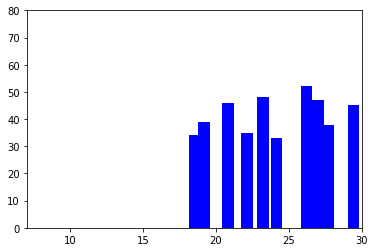

In [211]:
plt.bar(temp, rides, color="b", align="center")
plt.ylim(0, 80)
plt.xlim(7, 30)

In [140]:
#Takes a sample every 24hours
#in order to gather one value per week calculate the lenght of the data set and divide it by (24 hours * 7 days)
counter247 = len(NYC_df.iloc[:,0:1])/24
#number is the first value that will be used, e.g. look for the time and date on the first week of the csv
#inter the index value of the csv as the 'number' and you will get one sample for every week at that
#exact time of the day
number = 14
temp = []
rides = []

for x in range(int(counter247)):
    b = NYC_df.iloc[number,]
    b = pd.DataFrame(b)
    # add temperature to list
    #b.iat[1,0]
    temp.append(b.iat[1,0])
    #temp.append(int(b.iat[1,0]))
    # add number of rides to list
    rides.append(b.iat[2,0])
    number = number + 24 #24 takes a sample every 24 hours

#creat dictoniry if needed
k = dict(zip(temp,rides))


In [225]:
#Compare number of rides at noon divided by temperature
counter247 = len(NYC_df.iloc[:,0:1])/24
#number is the first value that will be used, e.g. look for the time and date on the first week of the csv
#inter the index value of the csv as the 'number' and you will get one sample for every week at that
#exact time of the day
number = 12
temp = []
rides = []


for x in range(int(counter247)):
    b = NYC_df.iloc[number,]
    b = pd.DataFrame(b)
    # add temperature to list
    #b.iat[1,0]
    temp.append(b.iat[1,0])
    #temp.append(int(b.iat[1,0]))
    # add number of rides to list
    rides.append(b.iat[2,0])
    number = number + 24 #24 takes a sample every 24 hours
    


#creat dictoniry if needed
k = dict(zip(temp,rides))


    

In [250]:
cold_df = NYC_df.loc[NYC_df['Temperature F'] < 15]
cold = cold_df["number_of_rides"].mean()
warm_df = NYC_df.loc[NYC_df['Temperature F'] > 16]
warm_df = warm_df.loc[warm_df['Temperature F'] < 26]
warm = warm_df["number_of_rides"].mean()

hot_df = NYC_df.loc[NYC_df['Temperature F'] > 25]
hot = hot_df["number_of_rides"].mean()
warm

40.887728459530024

In [ ]:
cold = 38.23
warm = 40.89
hot = 44.92